In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

import sys
if "../src/" not in sys.path:
    sys.path.insert(0,"../src/")
from pbcpy.grid import DirectGrid, ReciprocalGrid
from pbcpy.field import DirectField, ReciprocalField
from pbcpy.functionals import *
%matplotlib inline
%load_ext autoreload
%autoreload 2
#

ModuleNotFoundError: No module named 'pbcpy'

In [ ]:
from pbcpy.local_functionals_utils import ThomasFermiEnergy, ThomasFermiPotential
from pbcpy.local_functionals_utils import vonWeizsackerEnergy, vonWeizsackerPotential
from pbcpy.formats.qepp import PP
from pbcpy.formats.xsf import XSF
from pbcpy.local_functionals_utils import x_TF_y_vW 
from pbcpy.nonlocal_functionals_utils import LindhardFunction, MGP_kernel, WT_kernel
from pbcpy.local_pseudopotential import NuclearElectron
from pbcpy.hartree import HartreeFunctional

In [ ]:
def data_read(i):
    print(i)
    density = PP('../../Densities2/Al_'+str(i)+'_0_fde_0rho.pp').read()
    kin_pot = PP('../../Potentials2/Al_'+str(i)+'_0_vt_rhotot_alph.pp').read()
    density =density.field
    kin_pot =kin_pot.field/2.
#    ThomasFermi = Functional(name='TF',energydensity=ThomasFermiEnergy(data_dens), potential=ThomasFermiPotential(data_dens))
#    vonWeizsacker = Functional(name='vW',energydensity=vonWeizsackerEnergy(data_dens), potential=vonWeizsackerPotential(data_dens,Sigma=0.1))
    ThomasFermi = Functional(name='TF',energydensity=ThomasFermiEnergy(density), potential=ThomasFermiPotential(density))
    vonWeizsacker = Functional(name='vW',energydensity=vonWeizsackerEnergy(density), potential=vonWeizsackerPotential(density,Sigma=0.1))
    
    potential_NL= kin_pot - ThomasFermi.potential - vonWeizsacker.potential
    return density, potential_NL


#first input adds 1, second input adds 10 lines, third input adds 500 lines

In [2]:
# Initializing arrays which are going to be filled with the data

# in data_pot we store the nonlocal part of the potential
data_dens = []
data_pot = []
for j in range(1,101):
    density,potential = data_read(j)
    data_dens.append(density) 
    data_pot.append(potential)
print(np.shape(data_dens))
print(np.shape(data_pot))

NameError: name 'data_read' is not defined

In [13]:
print(density[49,0,0])
print(np.shape(density))

[0.00761252]
(50, 50, 50, 1)


In [14]:
dens_train = data_dens[0:80]
dens_test = data_dens[80:100]
pot_train = data_pot[0:80]
pot_test = data_pot[80:100]
print(np.shape(dens_train))
print(dens_train)

(80, 50, 50, 50, 1)
[DirectField([[[[0.03834769],
               [0.03818566],
               [0.03755185],
               ...,
               [0.03614609],
               [0.03729658],
               [0.03804326]],

              [[0.03536745],
               [0.03517687],
               [0.03456426],
               ...,
               [0.03352447],
               [0.03451502],
               [0.03514008]],

              [[0.03271234],
               [0.03249714],
               [0.03190281],
               ...,
               [0.03117006],
               [0.03202747],
               [0.03255042]],

              ...,

              [[0.04848923],
               [0.04841902],
               [0.0477095 ],
               ...,
               [0.04503071],
               [0.04675086],
               [0.04792258]],

              [[0.04502469],
               [0.04492376],
               [0.0442395 ],
               ...,
               [0.04199605],
               [0.04352038],
          

In [17]:
density2 = np.zeros((100,125000))
potential2 = np.zeros((100,125000))
density2 = np.append(density)
for i in density2:
    for j in density2[i]:
        for k in density2[j]:
            for l in density2[k]:
                print(density2[i])

#g  = np.sqrt(density.grid.get_reciprocal().gg)
#nr = density.grid.get_reciprocal().nr
##g_abs is all the non-equivalent vector lengths
#list_g = []
#for i in np.arange(nr[0]):
    #for j in np.arange(nr[1]):
        #for k in np.arange(nr[2]):
         #   g_new = g[i,j,k]
          #  if g_new in list_g:
           #     continue
            #elif g_new not in list_g:
             #   list_g.append(g_new)
#list_g = np.zeros_like(data_dens)
#list_g.sort()
#g_abs = np.array(list_g)
#np.shape(g_abs)

TypeError: append() missing 1 required positional argument: 'values'

In [1]:
for i in density:
    for j in density[i]:
        for k in dens_train[i,j]:
            for l in dens_train[i,j,k]:
                print(dens_train[i,j,k,l])

NameError: name 'density' is not defined

In [2]:
density_train = dens_train[0]
print(np.shape(density_train[0]))
print(density_train[0]

SyntaxError: unexpected EOF while parsing (<ipython-input-2-b6f76005b400>, line 3)

In [3]:
from sklearn.neural_network import MLPRegressor

ModuleNotFoundError: No module named 'sklearn'

In [4]:
n_layer = [(8,), (10,), (12,) ]
solve = ['adam','lbfgs','sgd']
alpha = [0.01, 0.001, 0.0001]
score_array_2 = np.zeros((len(solve),len(n_layer),len(alpha)))
inner = 0
inner2 = 0
inner3 = 0
for j in n_layer:
    inner2 = 0
    for i in solve:
        inner3 = 0
        for h in alpha:
            modelnn = MLPRegressor(hidden_layer_sizes= j, alpha = h, solver = i)
            modelnn.fit(density_train, pot_train)
            predict_nn = modelnn.predict(dens_test)
            score = 0.1*(1/125000)*np.sum(np.abs((predict_nn[:]-pot_test[:])/pot_test[:]))
            print('n_layer: ',j,'solver: ',i, 'alpha:', h, 'score: ',score)
            score_array_2[inner][inner2][inner3] = score
            print (score_array_2[inner][inner2][inner3])
            inner3 +=1
        inner2 += 1
    inner += 1

NameError: name 'np' is not defined

In [5]:
#plotting the mean error
mpl.rcParams['figure.figsize'] = (10,12)
fig, axes = plt.subplots(nrows=3,ncols=1)
for i in range(len(solve)):
    for j in range(len(n_layer)):
        print (solve[i],n_layer[j], score_array_2[i][j])
        axes[i].plot(alpha,score_array_2[i][j],label = 'Solver: '+solve[i]+' n_layer: '+str(n_layer[j]), marker = 'o')
        axes[i].set_xlabel('alpha')
        axes[i].set_ylabel('mean error')
        axes[i].legend()
plt.show()

NameError: name 'mpl' is not defined

In [6]:
#figuring out which point yields the lowest mean error
model_adam = MLPRegressor(solver = 'adam', hidden_layer_sizes = 8, alpha = 0.0010)
model_lbfgs = MLPRegressor(solver = 'lbfgs', hidden_layer_sizes = 8, alpha = 0.0000)
model_sgd = MLPRegressor(solver = 'sgd', hidden_layer_sizes = 8, alpha = 0.0001)

#fitting the solvers to the data
model_adam.fit(dens_train, kernel_train)
model_lbfgs.fit(dens_train, kernel_train)
model_sgd.fit(dens_train, kernel_train)

pred_adam = model_adam.predict(dens_test)
pred_lbfgs = model_lbfgs.predict(dens_test)
pred_sgd = model_sgd.predict(dens_test)

import matplotlib.pyplot as plt

NameError: name 'MLPRegressor' is not defined

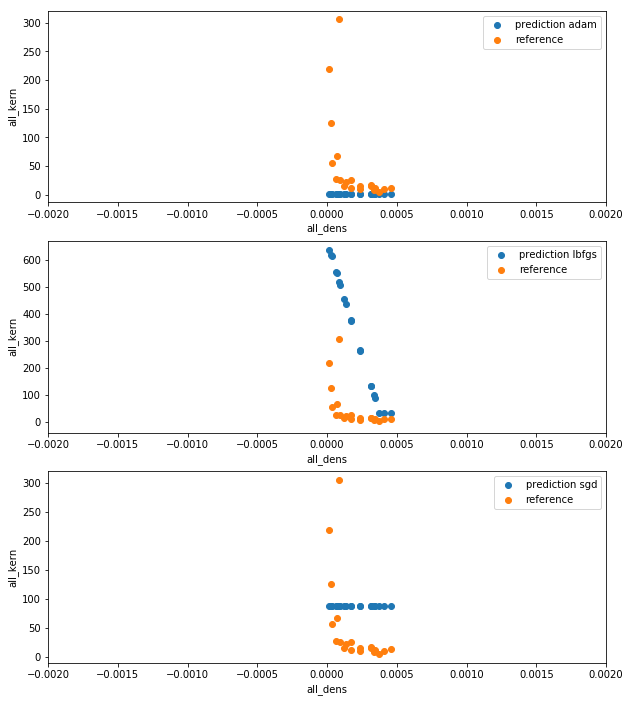

In [0]:
#seeing how accurate the prediction is
fig, axes = plt.subplots(nrows=3,ncols=1)

axes[0].scatter(dens_test, pred_adam, label = 'prediction adam')
axes[0].scatter(dens_test, kernel_test, label = 'reference')

axes[1].scatter(dens_test, pred_lbfgs, label = 'prediction lbfgs')
axes[1].scatter(dens_test, kernel_test, label = 'reference')

axes[2].scatter(dens_test, pred_sgd, label = 'prediction sgd')
axes[2].scatter(dens_test, kernel_test, label = 'reference')

#axes[0].set_ylim([-1,1])

for i in range(3):
    axes[i].set_xlabel('all_dens')
    axes[i].set_ylabel('all_kern')
    axes[i].legend()
    axes[i].set_xlim(-0.002, 0.002)
plt.show()